# Análisis de componentes principales - ejemplos aclaradores

**EJEMPLO 1** 

Iniciaremos con un ejercicio sencillo para una base de dos variables. Simularemos datos:


In [0]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [0]:
x=100*np.random.random_sample(50)

In [0]:
y=-2*x+200 +30*np.random.random_sample(50)

In [0]:
import matplotlib.pyplot as plt

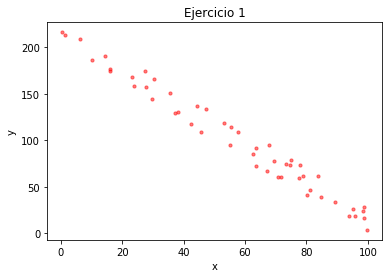

In [0]:
plt.scatter(x, y, s=10, c='red', alpha=0.5)
plt.title('Ejercicio 1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [0]:
DF=pd.DataFrame(np.transpose(np.array([x,y])),columns=['x','y'])
DF.describe()

,x,y
count,50.000000,50.000000
mean,56.665272,101.396629
std,29.146435,58.880530
min,0.552178,3.512724
25%,31.563637,60.665593
50%,63.113020,92.893595
75%,78.645843,148.865008
max,99.644317,216.369891


In [0]:
scaler = StandardScaler()
DFT = scaler.fit_transform(DF)
[DFT[:,0].mean(),DFT[:,1].mean(),DFT[:,0].std(),DFT[:,1].std()]

[3.1086244689504386e-17,
 1.021405182655144e-16,
 0.9999999999999999,
 0.9999999999999999]

In [0]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(DFT)
DFPC = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
DFPC.describe()

,PC1,PC2
count,5.000000e+01,5.000000e+01
mean,-4.440892e-17,-2.775558e-19
std,1.423872e+00,1.157748e-01
min,-2.240718e+00,-1.768660e-01
25%,-1.029009e+00,-1.108870e-01
50%,-3.179390e-01,2.870494e-03
75%,1.160949e+00,9.506798e-02
max,2.769904e+00,1.876763e-01


In [0]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
per_var

array([99.3,  0.7])

In [0]:
COV=np.cov(np.transpose(DFT))
COV

array([[ 1.02040816, -1.00700436],
       [-1.00700436,  1.02040816]])

In [0]:
np.linalg.eig(COV)

(array([0.0134038 , 2.02741253]), array([[-0.70710678,  0.70710678],
        [-0.70710678, -0.70710678]]))

In [0]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

[-0.70710678  0.70710678]
2.0274125257627853
[0.70710678 0.70710678]
0.013403800767826162


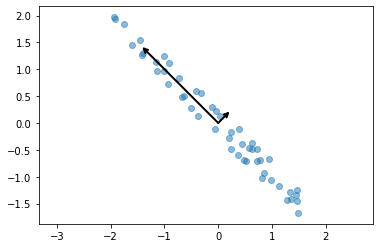

In [0]:
plt.scatter(DFT[:,0],DFT[:,1], alpha=0.5)
L2=[2,0.3]
i=0
for length, vector in zip(pca.explained_variance_, pca.components_):
  print(vector)
  print(length)
  v = vector*L2[i]
  i=+1
  draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.show()

(-2.501106078678592,
 3.030292248510219,
 -0.2102697173960261,
 0.22108006172918448)

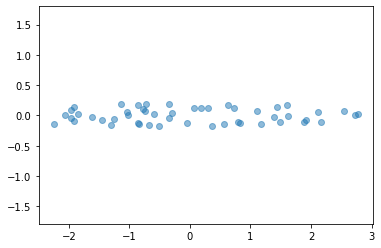

In [0]:
DFPC.values
plt.scatter(DFPC.values[:,0],DFPC.values[:,1], alpha=0.5)
plt.axis("equal")

**EJEMPLO 2** 

Volvamos con IRIS

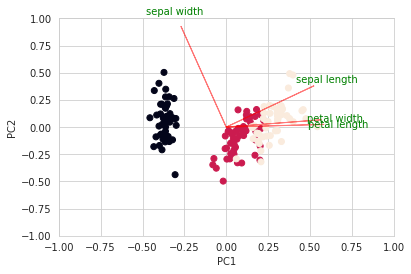

In [0]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    

pca = PCA()
x_new = pca.fit_transform(X)
columnasiris=["sepal length",	"sepal width",	"petal length",	"petal width"]
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, columnasiris[i], color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
biplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [0]:
np.transpose(pca.components_[0:2, :])

array([[ 0.52106591,  0.37741762],
       [-0.26934744,  0.92329566],
       [ 0.5804131 ,  0.02449161],
       [ 0.56485654,  0.06694199]])